In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
path_list = glob.glob("local_results/*")
path_list

['local_results/contrastive_run_8.pkl',
 'local_results/contrastive_run_7.pkl',
 'local_results/contrastive_run_0.pkl',
 'local_results/contrastive_run_1.pkl',
 'local_results/contrastive_run_2.pkl',
 'local_results/contrastive_run_4.pkl',
 'local_results/contrastive_run_6.pkl',
 'local_results/contrastive_run_9.pkl',
 'local_results/contrastive_run_3.pkl',
 'local_results/contrastive_run_5.pkl']

In [3]:
eg_data = pd.read_pickle(path_list[2])

In [4]:
print(eg_data.keys())
print(eg_data["contrastive_hebb"].keys())
[print(key, type(val)) for key, val in eg_data["contrastive_hebb"].items()]
print("weight shape", eg_data["contrastive_hebb"]["learned_W1"].shape)
print("angles shape", eg_data["contrastive_hebb"]["data"].angles.shape)

dict_keys(['contrastive_hebb', 'gradient_descent', 'quasi_predictive', 'hebbian', 'anti_hebbian'])
dict_keys(['RSM', 'loss', 'learned_W1', 'learned_W2', 'W1_grad', 'W2_grad', 'save_every', 'data', 'learning_rate', 'tuned_neurons_width'])
RSM <class 'jaxlib.xla_extension.ArrayImpl'>
loss <class 'list'>
learned_W1 <class 'jaxlib.xla_extension.ArrayImpl'>
learned_W2 <class 'jaxlib.xla_extension.ArrayImpl'>
W1_grad <class 'list'>
W2_grad <class 'list'>
save_every <class 'int'>
data <class 'angle_discrimination_task.AngleDiscriminationTask'>
learning_rate <class 'float'>
tuned_neurons_width <class 'int'>
weight shape (2000, 40, 80)
angles shape (80,)


In [5]:
def compute_mean_func(path_list, model_key, func, func_kwargs):
    all_quant = []
    for path in all_list:
        results = pd.read_pickle(path)[model_key]
        all_quant.append(func(results))
    all_quant = np.stack(all_quant, axis=0)
    return np.mean(all_quant, axis=0)

In [6]:
def slope_PO_TO(results, normalize_tuning=True, weight_index=-1, TO=90.0):
    W1 = np.array(results["learned_W1"][weight_index, ...])
    data = results["data"]
    
    PO_index = np.argmax(W1, axis=1)
    angles = data.angles
    if normalize_tuning:
        W1 = W1/np.amax(W1, axis=1)[:, np.newaxis]
    
    PO = angles[PO_index]
    slopes = np.diff(np.concatenate([W1, W1[:, 1][:, np.newaxis]], axis=1), axis=1)
    x_axis = PO - TO
    TO_index = np.argmin(np.abs(angles-TO))
    y_axis = np.abs(slopes[:, TO_index])
    
    sort_index = np.argsort(x_axis)
    x_axis = x_axis[sort_index]
    y_axis = y_axis[sort_index]
    return x_axis, y_axis

In [7]:
x_axis, naive_slopes = slope_PO_TO(eg_data["gradient_descent"], weight_index=0)
x_axis, expert_slopes = slope_PO_TO(eg_data["gradient_descent"], weight_index=-1)

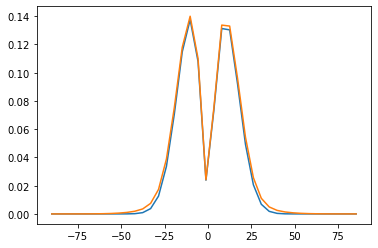

In [8]:
plt.plot(x_axis, naive_slopes, label="naive")
plt.plot(x_axis, expert_slopes, label="expert")